In [ ]:
# Elbow method : https://m.balog.naver.com/samsjang/221017639342
# Silhoutte Score : https://astralworld58.tistory.com/59

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

데이터 불러오기 및 처리

In [ ]:
data_path = '/content/drive/MyDrive/개인 연구/강의 수강/(패스트 캠퍼스) 데이터 분석/Ch7 Kmeans/Mall_Customers.csv'
data = pd.read_csv(data_path, index_col=0)   # 0번째 column이 자동으로 index로 사용되도록 설정

In [ ]:
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

KMeans 모델 정의 및 학습

In [ ]:
model = KMeans(n_clusters=3)

In [ ]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

결과 분석

In [ ]:
result_df = data.copy()

In [ ]:
# label column에 모델링 결과값 label 할당
result_df['label'] = model.labels_

In [ ]:
result_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,0
2,21,15,81,1,0
3,20,16,6,0,0
4,23,16,77,0,0
5,31,17,40,0,0
...,...,...,...,...,...
196,35,120,79,0,1
197,45,126,28,0,2
198,32,126,74,1,1


In [ ]:
# Groupby를 통하여, 각 클러스터별 통계적 차이/특징 확인
result_df.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,40.325203,44.154472,49.829268,0.406504
1,32.692308,86.538462,82.128205,0.461538
2,40.394737,87.000000,18.631579,0.526316


In [ ]:
# Cluster별 관측치 갯수 확인
result_df['label'].value_counts()

0    123
1     39
2     38
Name: label, dtype: int64

최적 군집 수 구하기 : Elbow Method

In [ ]:
distance = []

for i in range(2,11):
  model = KMeans(n_clusters=i)
  model.fit(data)
  distance.append(model.inertia_) # intertia : 군집에서 각 데이터 포인트까지의 거리를 합산

In [ ]:
distance

[212889.44245524297,
 143391.5923603568,
 104422.8349853975,
 75399.61541401483,
 58348.64136331505,
 51132.7032125769,
 44389.807673557676,
 41077.878186378184,
 37084.6755930271]

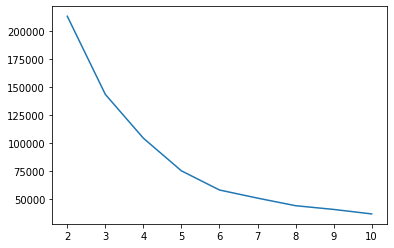

In [ ]:
sns.lineplot(x=list(range(2,11)), y=distance)

최적 군집 수 구하기 : Silhoutte Score

In [ ]:
silhouette_score(data, model.labels_)

0.3856529512284337

In [ ]:
sil = []
for i in range(2, 11):
  model = KMeans(n_clusters=i)
  model.fit(data)
  sil.append(silhouette_score(data, model.labels_))

In [ ]:
sil

[0.29307334005502633,
 0.383798873822341,
 0.4052954330641215,
 0.4402372958247734,
 0.45205475380756527,
 0.44096462877395787,
 0.4294098819758089,
 0.41273936332819244,
 0.3839598287763625]

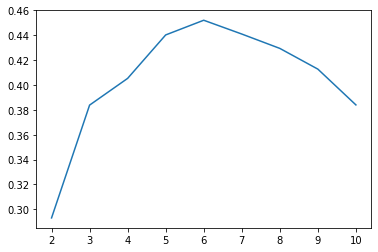

In [ ]:
sns.lineplot(x=list(range(2,11)), y=sil)

최적의 군집 수 값을 이용한 모델링

In [ ]:
model = KMeans(n_clusters=6)

In [ ]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
data['label'] = model.labels_

In [ ]:
data['label'] = model.labels_

모델 결과 확인

In [ ]:
data.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,27.000000,56.657895,49.131579,0.342105
1,44.142857,25.142857,19.523810,0.380952
2,41.685714,88.228571,17.285714,0.571429
3,25.272727,25.727273,79.363636,0.409091
4,56.155556,53.377778,49.088889,0.444444
5,32.692308,86.538462,82.128205,0.461538


각 변수의 특성 차이 확인 : Box Plot

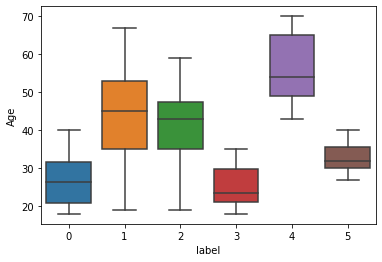

In [ ]:
sns.boxplot(x='label', y='Age', data=data)

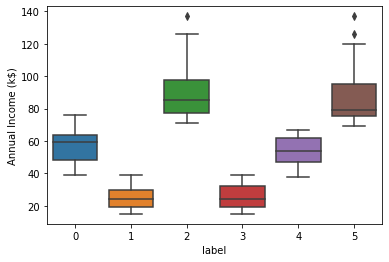

In [ ]:
sns.boxplot(x='label', y='Annual Income (k$)', data=data)

변수 줄이기 : PCA

In [ ]:
data.drop('label', axis=1, inplace=True)  # 다시 독립변수만 고려하도록 label을 drop

In [ ]:
# 2개의 변수로 줄이도록 파라미터 설정
pca = PCA(n_components=2)

In [ ]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca_df = pca.transform(data)

In [ ]:
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])

In [ ]:
pca_df

,PC1,PC2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412
...,...,...
195,58.352515,31.017542
196,19.908001,66.446108
197,58.520804,38.346039
198,20.979130,79.376405


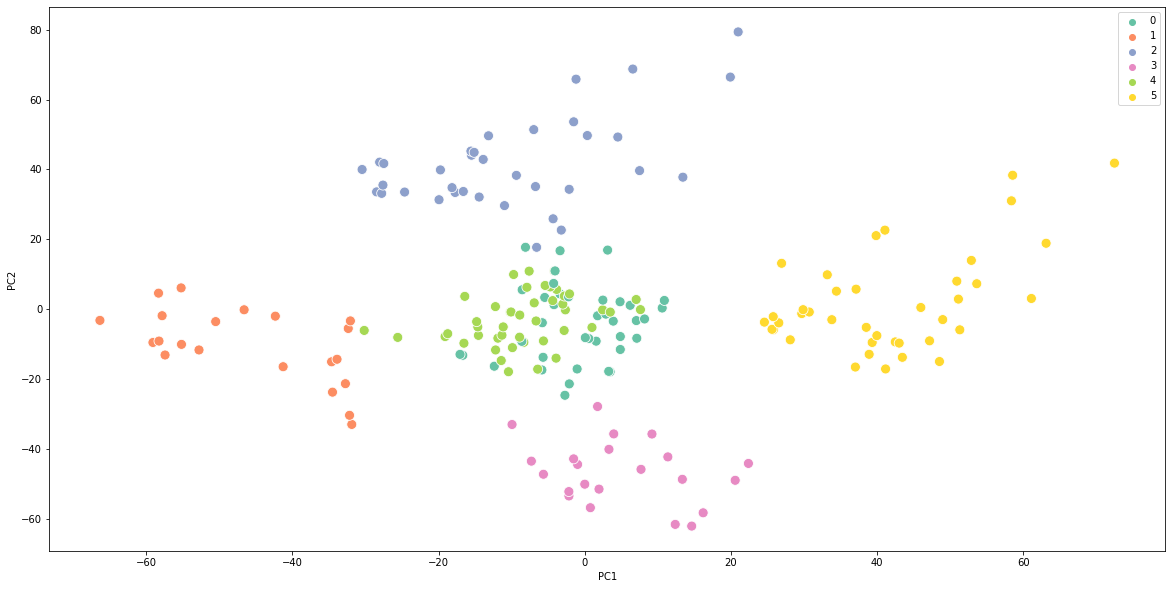

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue = model.labels_, palette='Set2', s=100)